# Compsci 571 HW4 Question 4.2, 4.3
## SVM training and testing

Yilin Gao (yg95)

Python 3.6

In [8]:
import numpy as np
from sklearn import svm, metrics
import matplotlib.pyplot as plt

Separate data into training (0.9) and testing (0.1) sets.

In [9]:
data = np.genfromtxt('creditCard.csv', delimiter=',', skip_header=1)
n = data.shape[0]
X = data[:, :-1]
y = data[:, -1]
print(X.shape, y.shape)

(1319, 9) (1319,)


In [10]:
np.random.seed(2018)
train_idx = np.random.choice(n, int(n * 0.9), replace = False)
test_idx = np.array(list(set(range(n)) - set(train_idx)))
X_train, y_train = X[train_idx, :], y[train_idx]
X_test, y_test = X[test_idx, :], y[test_idx]

## Linear kernel SVM

In [11]:
linear_svm = svm.LinearSVC()

In [12]:
linear_svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [13]:
yhat_test = linear_svm.predict(X_test)

In [16]:
accu_linear = metrics.accuracy_score(y_test, yhat_test)
auc_linear = metrics.roc_auc_score(y_test, yhat_test)
fpr_linear, tpr_linear, thresholds_linear = metrics.roc_curve(y_test, yhat_test, pos_label=1)
print('Linear SVM:')
print('Accuracy on testing data:', accu_linear)
print('AUC on testing data:', auc_linear)

Linear SVM:
Accuracy on testing data: 0.8181818181818182
AUC on testing data: 0.6545718432510885


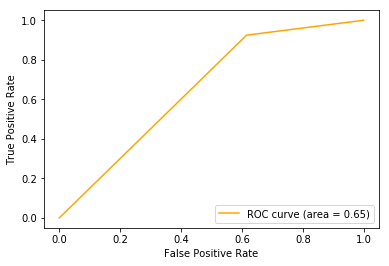

In [15]:
plt.plot(fpr_linear, tpr_linear, color='orange', label='ROC curve (area = %0.2f)' % auc_linear)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Radial base kernel, $\sigma^2 = 25$

In [17]:
rbf25_svm = svm.SVC(kernel='rbf', gamma=1/25)

In [18]:
rbf25_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.04, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
yhat_test_rbf25 = rbf25_svm.predict(X_test)

In [22]:
accu_rbf25 = metrics.accuracy_score(y_test, yhat_test_rbf25)
auc_rbf25 = metrics.roc_auc_score(y_test, yhat_test_rbf25)
fpr_rbf25, tpr_rbf25, thresholds_rbf25 = metrics.roc_curve(y_test, yhat_test_rbf25, pos_label=1)
print('Gaussian kernel with sigma^2 = 25 SVM:')
print('Accuracy on testing data:', accu_rbf25)
print('AUC on testing data:', auc_rbf25)

Gaussian kernel with sigma^2 = 25 SVM:
Accuracy on testing data: 0.8181818181818182
AUC on testing data: 0.5384615384615384


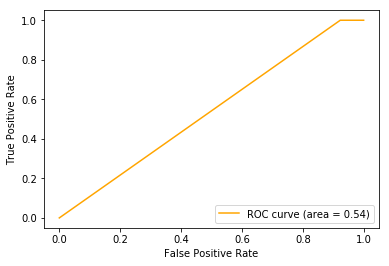

In [23]:
plt.plot(fpr_rbf25, tpr_rbf25, color='orange', label='ROC curve (area = %0.2f)' % auc_rbf25)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Radial base kernel, $\sigma^2 = 5$

In [24]:
rbf5_svm = svm.SVC(kernel='rbf', gamma=1/5)

In [25]:
rbf5_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
yhat_test_rbf5 = rbf5_svm.predict(X_test)

In [27]:
accu_rbf5 = metrics.accuracy_score(y_test, yhat_test_rbf5)
auc_rbf5 = metrics.roc_auc_score(y_test, yhat_test_rbf5)
fpr_rbf5, tpr_rbf5, thresholds_rbf5 = metrics.roc_curve(y_test, yhat_test_rbf5, pos_label=1)
print('Gaussian kernel with sigma^2 = 5 SVM:')
print('Accuracy on testing data:', accu_rbf5)
print('AUC on testing data:', auc_rbf5)

Gaussian kernel with sigma^2 = 5 SVM:
Accuracy on testing data: 0.803030303030303
AUC on testing data: 0.5


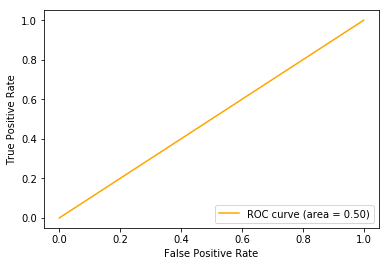

In [29]:
plt.plot(fpr_rbf5, tpr_rbf5, color='orange', label='ROC curve (area = %0.2f)' % auc_rbf5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()